**Importing the relevant python Libraries**

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


**Importing the dataset**

In [4]:
df=pd.read_csv('/content/flight_prediction_data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Data Handling and Processing**

In [6]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
df.drop(columns='flight',axis=1,inplace=True)

In [8]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0
price,0


In [11]:
df.duplicated().sum()

np.int64(2213)

In [12]:
#Removing the duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Categorical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class']




In [15]:
# Label Encoding for Random Forest and XGBoost
df_enc = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_enc[col] = le.fit_transform(df_enc[col])
x_enc = df_enc.copy()


# Get categorical feature indices for CatBoost
categorical_indices = [x_enc.columns.get_loc(col) for col in categorical_cols]


In [16]:
x_enc.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

**Description of all variables**

In [17]:
x_enc.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000
mean,3.099966,2.579385,2.418484,0.275112,3.069685,2.589585,0.687276,12.283063,26.004602,20976.448604
std,1.835809,1.751424,1.754818,0.655706,1.742869,1.744450,0.463604,7.176754,13.557190,22734.394635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.920000,15.000000,4792.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.330000,26.000000,7466.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


**Understanding the Correlation between varibles features in the dataset**


1. Positive correlation
2. Negative correlation

In [ ]:
correlation = x_enc.corr(numeric_only=True)

<Axes: >

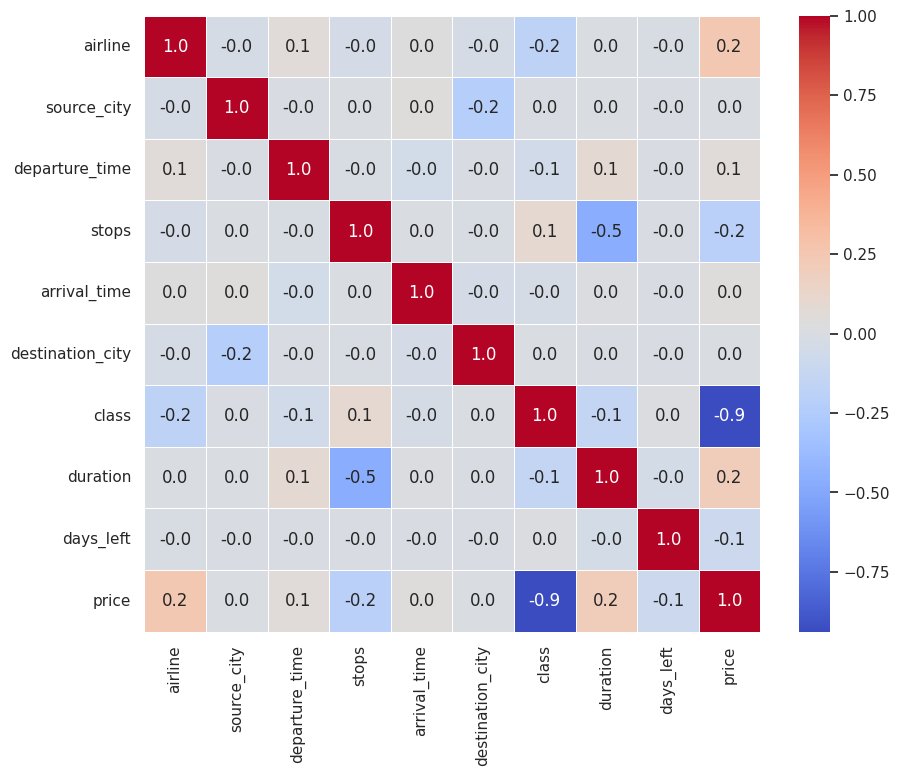

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True, cmap='coolwarm',linewidths=0.5)

**Distribution of Target variable**

/tmp/ipython-input-18-444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

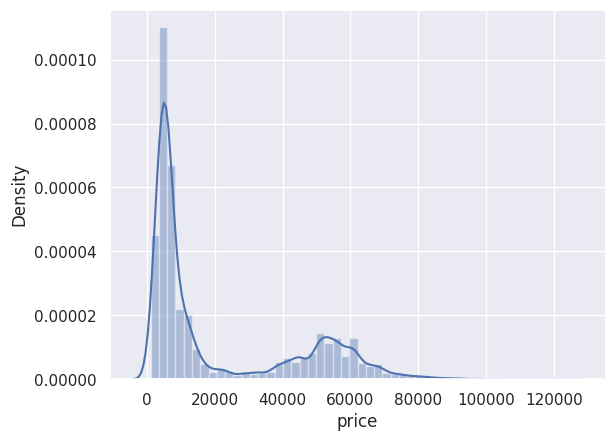

In [18]:
sns.distplot(df['price'])

**Removing the outliers for Target variable**

/tmp/ipython-input-19-2540323678.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['price'])


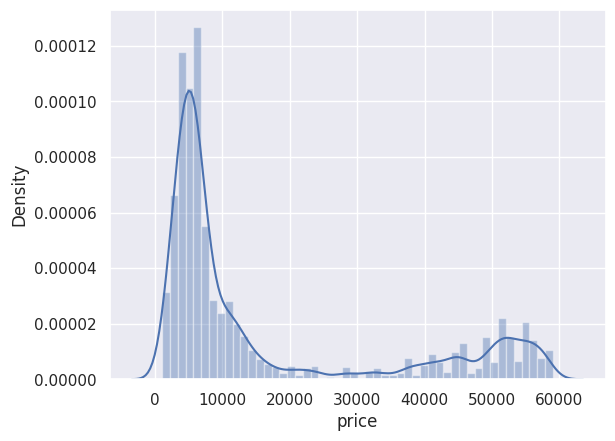

In [19]:
Q=df['price'].quantile(0.91)
data1=df[df['price']<Q]
sns.distplot(data1['price'])
plt.show()

**Applying the Logarithmic Transformation for Target variable**

/tmp/ipython-input-20-849447461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['log_price'] = np.log1p(data1['price'])  # log1p handles zero values


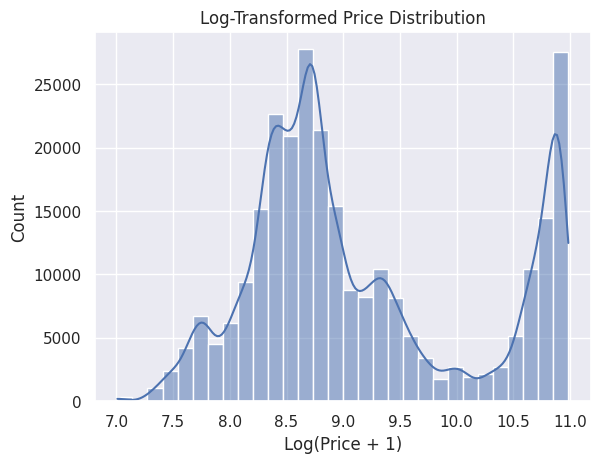

In [20]:
# Apply log transformation
data1['log_price'] = np.log1p(data1['price'])  # log1p handles zero values

# Plot the transformed price distribution
sns.histplot(data1['log_price'], kde=True, bins=30)
plt.xlabel('Log(Price + 1)')
plt.title('Log-Transformed Price Distribution')
plt.show()

**Understanding the relation between Targets and predictors**

/tmp/ipython-input-21-220096062.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_duration = df.groupby('log_price_bin')['duration'].mean().reset_index()


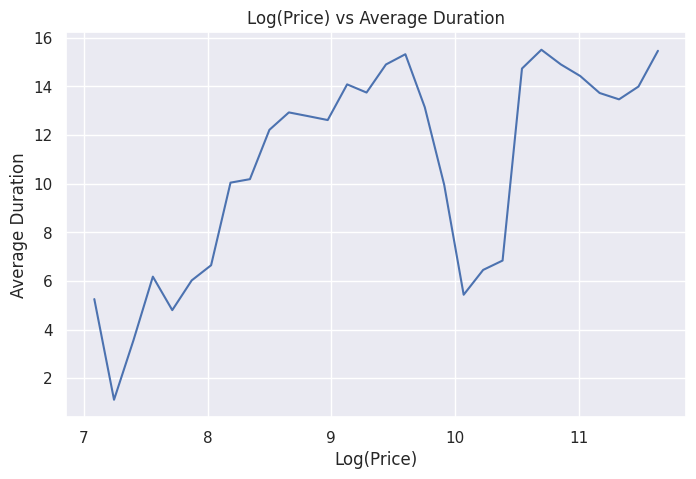

/tmp/ipython-input-21-220096062.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


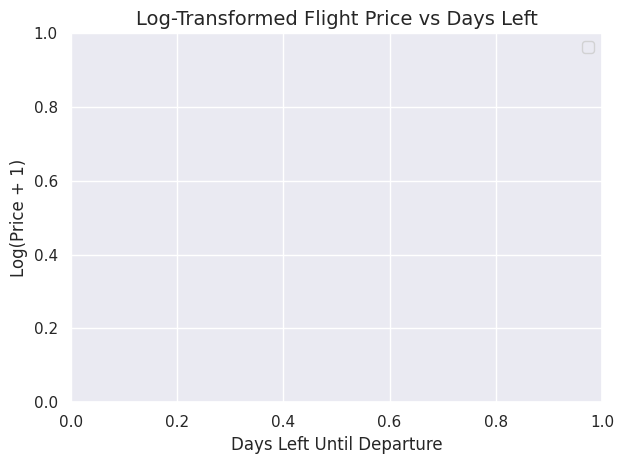

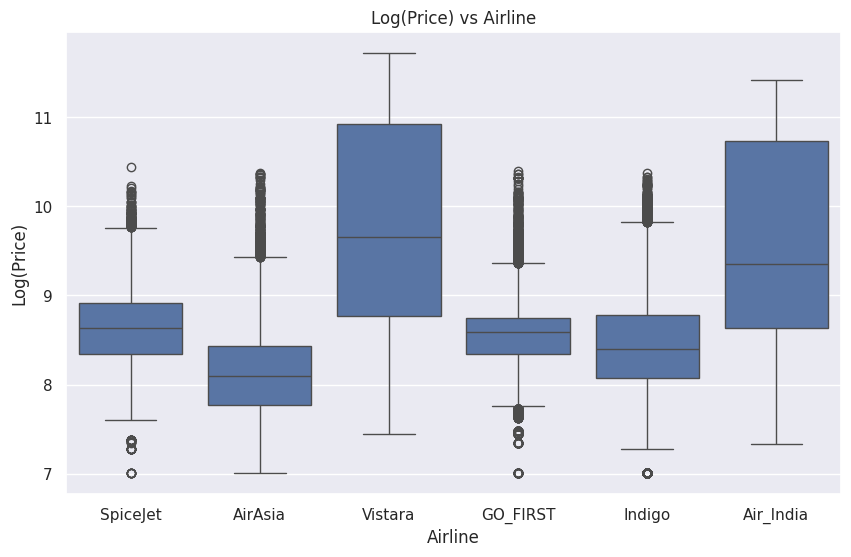

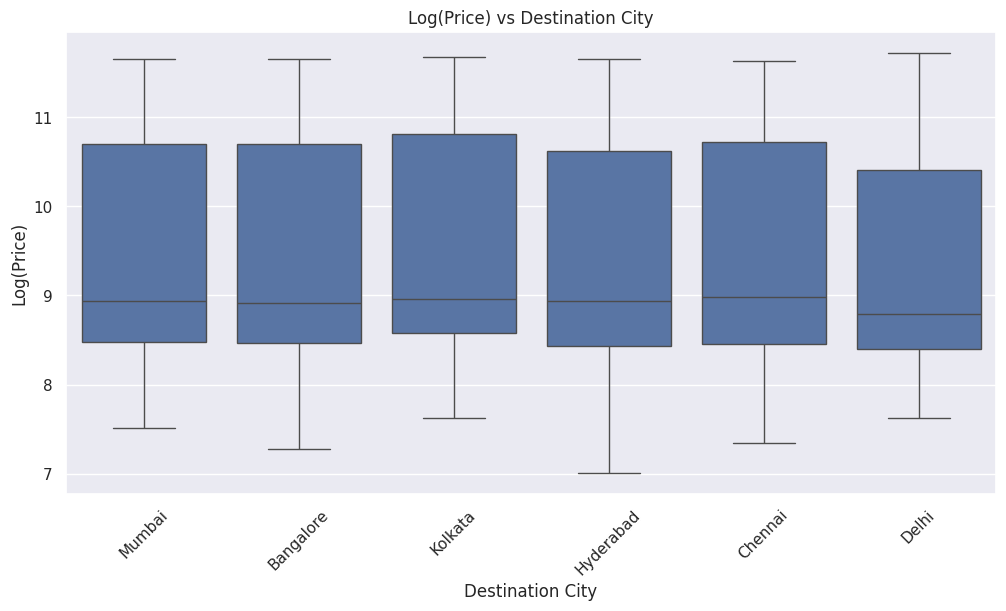

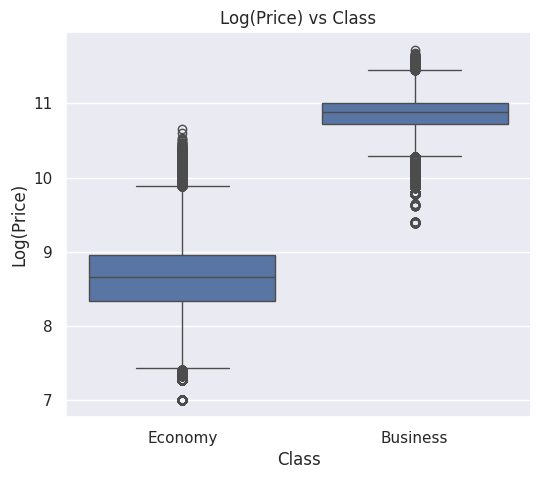

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create log_price column
df['log_price'] = np.log(df['price'])

# ───────────────────────────────────────────────
# 2. log_price vs duration (line plot with binning)
df['log_price_bin'] = pd.cut(df['log_price'], bins=30)
grouped_duration = df.groupby('log_price_bin')['duration'].mean().reset_index()
grouped_duration['midpoint'] = grouped_duration['log_price_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(8, 5))
sns.lineplot(x='midpoint', y='duration', data=grouped_duration)
plt.title('Log(Price) vs Average Duration')
plt.xlabel('Log(Price)')
plt.ylabel('Average Duration')
plt.show()

# ───────────────────────────────────────────────
plt.title('Log-Transformed Flight Price vs Days Left', fontsize=14)
plt.xlabel('Days Left Until Departure', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#----------------------------------------------
# 3. log_price vs airline (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='log_price', data=df)
plt.title('Log(Price) vs Airline')
plt.xlabel('Airline')
plt.ylabel('Log(Price)')
plt.show()

# ───────────────────────────────────────────────
# 4. log_price vs destination_city (box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_city', y='log_price', data=df)
plt.title('Log(Price) vs Destination City')
plt.xlabel('Destination City')
plt.ylabel('Log(Price)')
plt.xticks(rotation=45)
plt.show()

# ───────────────────────────────────────────────
# 5. log_price vs class (box plot)
plt.figure(figsize=(6, 5))
sns.boxplot(x='class', y='log_price', data=df)
plt.title('Log(Price) vs Class')
plt.xlabel('Class')
plt.ylabel('Log(Price)')
plt.show()

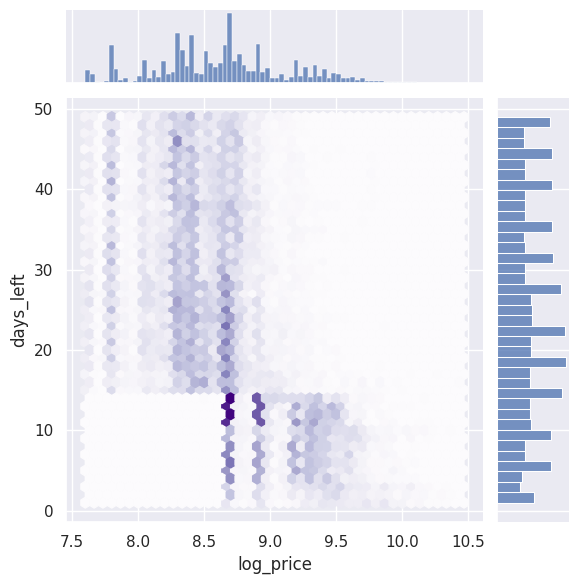

In [ ]:
sns.jointplot(x='log_price', y='days_left', data=df, kind='hex', cmap='Purples')

**Differentiating the Target and Predictors**

In [ ]:
# Step 6: Label encoding for categorical columns
df_enc = data1.copy()
le = LabelEncoder()

for col in categorical_cols:
    df_enc[col] = le.fit_transform(df_enc[col])

# Step 7: Define feature matrix X
x = df_enc.drop(columns=['price', 'log_price'])  # drop target columns

y=data1['log_price']

**Split the Data**

In [ ]:
x.shape,y.shape

((270790, 9), (270790,))

In [ ]:
# ============================
# 📊 Final Test Set Evaluation (Optional but Recommended)
# ============================

# Split separately for test evaluation (20%)
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_catboost, x_test_catboost, y_train_catboost,y_test_catboost = train_test_split(x, y, test_size=0.2, random_state=42)



**Traning the models**

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=42)
dt_model.fit(x_train_dt, y_train_dt)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train_xgb, y_train_xgb)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(x_train_rf, y_train_rf)
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_indices,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)
catboost_model.fit(x_train_catboost, y_train_catboost)


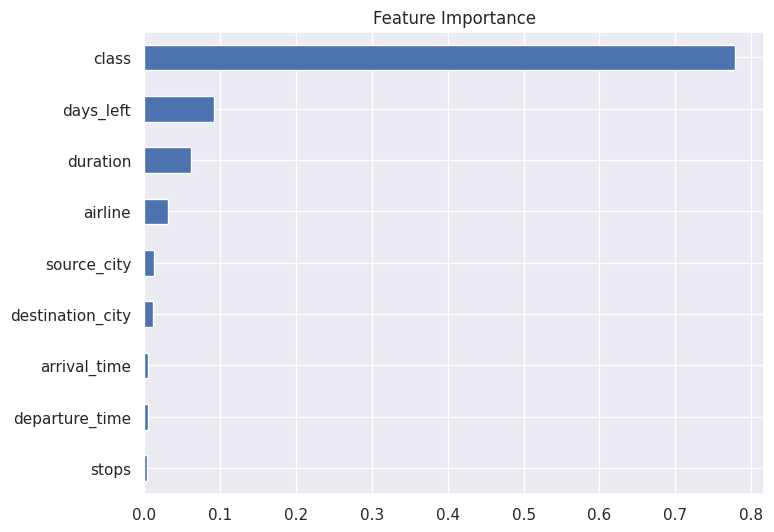

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
model=RandomForestRegressor()
# For models like RandomForest/XGBoost
importance = rf_model.feature_importances_
features = x.columns

# Plot
pd.Series(importance, index=features).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

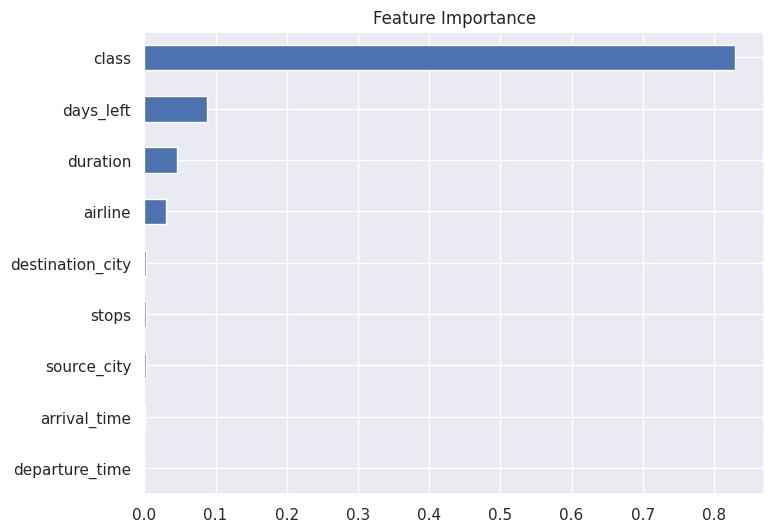

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
model=RandomForestRegressor()
# For models like RandomForest/XGBoost
importance = dt_model.feature_importances_
features = x.columns

# Plot
pd.Series(importance, index=features).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

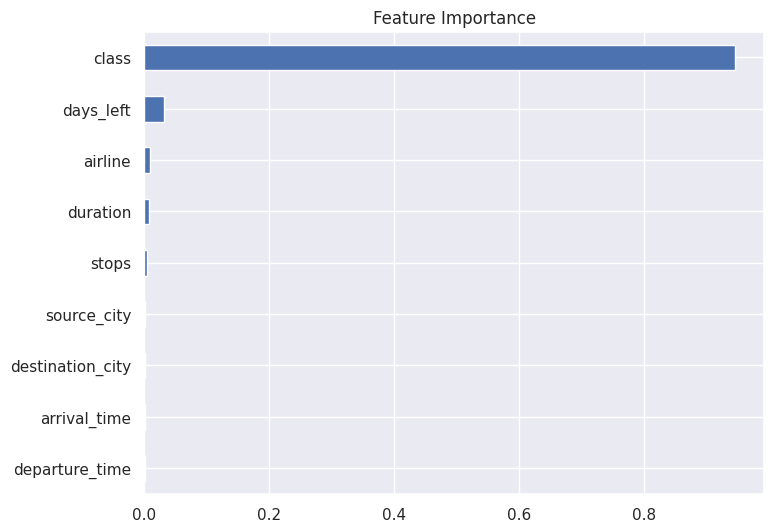

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
model=RandomForestRegressor()
# For models like RandomForest/XGBoost
importance = xgb_model.feature_importances_
features = x.columns

# Plot
pd.Series(importance, index=features).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

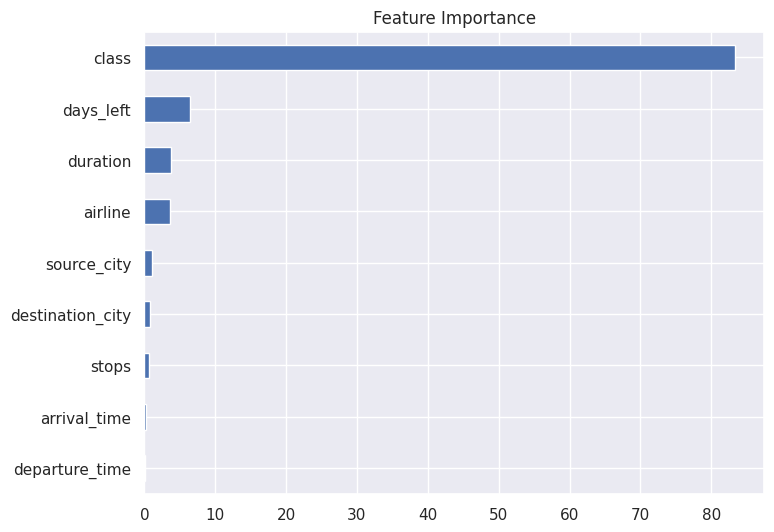

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
model=RandomForestRegressor()
# For models like RandomForest/XGBoost
importance = catboost_model.feature_importances_
features = x.columns

# Plot
pd.Series(importance, index=features).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

**Model Prediction**

In [ ]:
# Predict
y_pred_dt = dt_model.predict(x_train_dt)
y_pred_rf = rf_model.predict(x_train_rf)
y_pred_xgb = xgb_model.predict(x_train_xgb)
y_pred_cat = catboost_model.predict(x_train_catboost)

**Residuals of all the models**

/tmp/ipython-input-65-64541231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_dt -y_pred_dt)
/tmp/ipython-input-65-64541231.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_rf - y_pred_rf)
/tmp/ipython-input-65-64541231.py:7: UserWarning: 

`distplot` is a deprecated func

Text(0.5, 1.0, 'Residuals\xa0PDF')

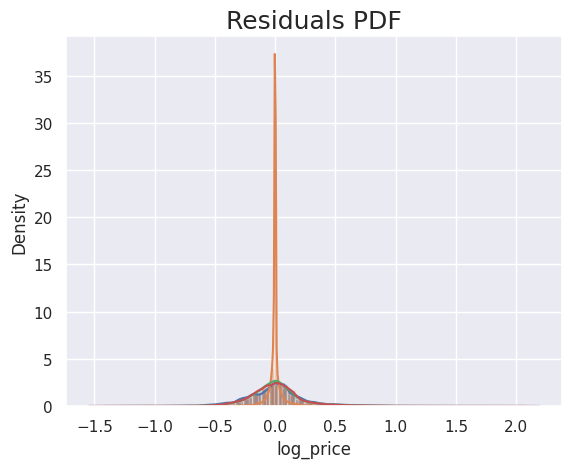

In [ ]:
sns.distplot(y_train_dt -y_pred_dt)
plt.title('Residuals PDF', size=18)

sns.distplot(y_train_rf - y_pred_rf)
plt.title('Residuals PDF', size=18)

sns.distplot(y_train_xgb - y_pred_xgb)
plt.title('Residuals PDF', size=18)

sns.distplot(y_train_catboost - y_pred_cat)
plt.title('Residuals PDF',size=18)


**Model Evaluation - DT vs RF vs XGBoost vs CatBoost**

**Evaluation Metric**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
#Decision Tree
r2=r2_score(y_train_dt,y_pred_dt)
mae=mean_absolute_error(y_train_dt,y_pred_dt)
mse=mean_squared_error(y_train_dt,y_pred_dt)
rmse=np.sqrt(mse)

#RandomForestRegressor
r21=r2_score(y_train_rf,y_pred_rf)
mae1=mean_absolute_error(y_train_rf,y_pred_rf)
mse1=mean_squared_error(y_train_rf,y_pred_rf)
rmse1=np.sqrt(mse1)

#XGBRegressor
r22=r2_score(y_train_xgb,y_pred_xgb)
mae2=mean_absolute_error(y_train_xgb,y_pred_xgb)
mse2=mean_squared_error(y_train_xgb,y_pred_xgb)
rmse2=np.sqrt(mse2)

#CatBRegressor
r23=r2_score(y_train_catboost,y_pred_cat)
mae3=mean_absolute_error(y_train_catboost,y_pred_cat)
mse3=mean_squared_error(y_train_catboost,y_pred_cat)
rmse3=np.sqrt(mse3)




summary=pd.DataFrame(data=['DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','CatBoostRegressor'],columns=['Model'])
summary['R^2']=[r2,r21,r22,r23]
summary['mae']=[mae,mae1,mae2,mae2]
summary['mse']=[mse,mse1,mse2,mse3]
summary['rmse']=[rmse,rmse1,rmse2,rmse3]
summary

,Model,R^2,mae,mse,rmse
0,DecisionTreeRegressor,0.938450,0.178003,0.062587,0.250173
1,RandomForestRegressor,0.997147,0.024655,0.002901,0.053858
2,XGBRegressor,0.956831,0.148947,0.043896,0.209513
3,CatBoostRegressor,0.956234,0.148947,0.044503,0.210958


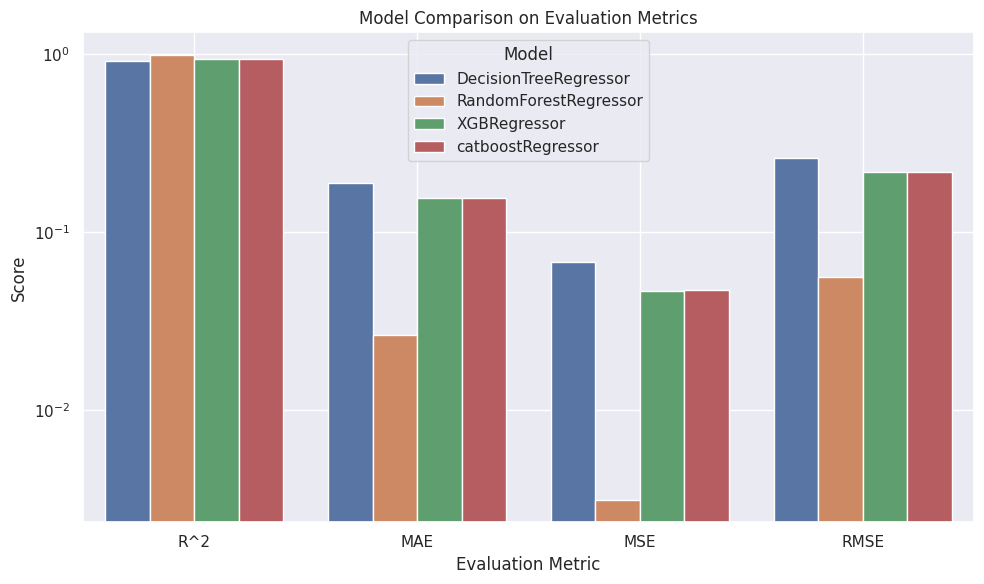

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from your summary
data = {
    'Model': ['DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','catboostRegressor'],
    'R^2': [0.911300,0.995919, 0.938874,	0.937933],
    'MAE': [0.188143,0.026613, 0.155647,0.155647],
    'MSE': [0.068228,0.003139,0.047018,0.047741],
    'RMSE': [0.261204,0.056030,0.216836,0.218498]
}

df = pd.DataFrame(data)

# Melt the dataframe for seaborn
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Comparison on Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

**Absolute Error by Models**

In [ ]:
errors = abs(y_train_dt - y_pred_dt)
print(errors.sort_values(ascending=False).head())

87630     2.128558
51784     2.004403
51785     2.004403
46455     1.958913
202044    1.921083
Name: log_price, dtype: float64


In [ ]:
errors = abs(y_train_rf - y_pred_rf)
print(errors.sort_values(ascending=False).head())

184718    0.781981
184583    0.690914
206044    0.645612
206650    0.619197
186940    0.618294
Name: log_price, dtype: float64


In [ ]:
errors = abs(y_train_xgb - y_pred_xgb)
print(errors.sort_values(ascending=False).head())

51784     2.017057
51785     1.997819
87630     1.851202
182662    1.839326
186632    1.837661
Name: log_price, dtype: float64


In [ ]:
errors = abs(y_train_catboost - y_pred_cat)
print(errors.sort_values(ascending=False).head())

51784    2.106665
51785    2.094739
87630    1.873721
45820    1.846831
46455    1.834892
Name: log_price, dtype: float64


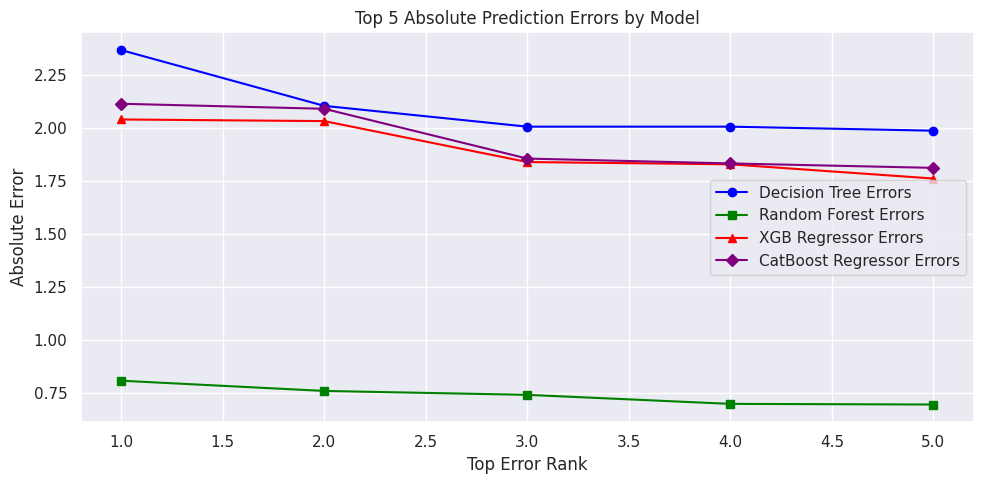

In [ ]:
import matplotlib.pyplot as plt

# Top 5 absolute errors from your screenshots
dt_errors = [2.365712, 2.102490, 2.004358, 2.004358, 1.985310]
rf_errors = [0.805908, 0.757677, 0.739206, 0.696652, 0.693558]
xgb_errors = [2.038240, 2.030591, 1.837485, 1.826723, 1.759651]
catboost_errors = [2.112418, 2.088682, 1.853794, 1.830861, 1.809973]

# X-axis labels (rank positions)
labels = [1, 2, 3, 4, 5]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(labels, dt_errors, marker='o', label='Decision Tree Errors', color='blue')
plt.plot(labels, rf_errors, marker='s', label='Random Forest Errors', color='green')
plt.plot(labels, xgb_errors, marker='^', label='XGB Regressor Errors', color='red')
plt.plot(labels, catboost_errors, marker='D', label='CatBoost Regressor Errors', color='purple')

plt.title('Top 5 Absolute Prediction Errors by Model')
plt.xlabel('Top Error Rank')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Model Prediction - DT vs RF vs XGB vs CATB**

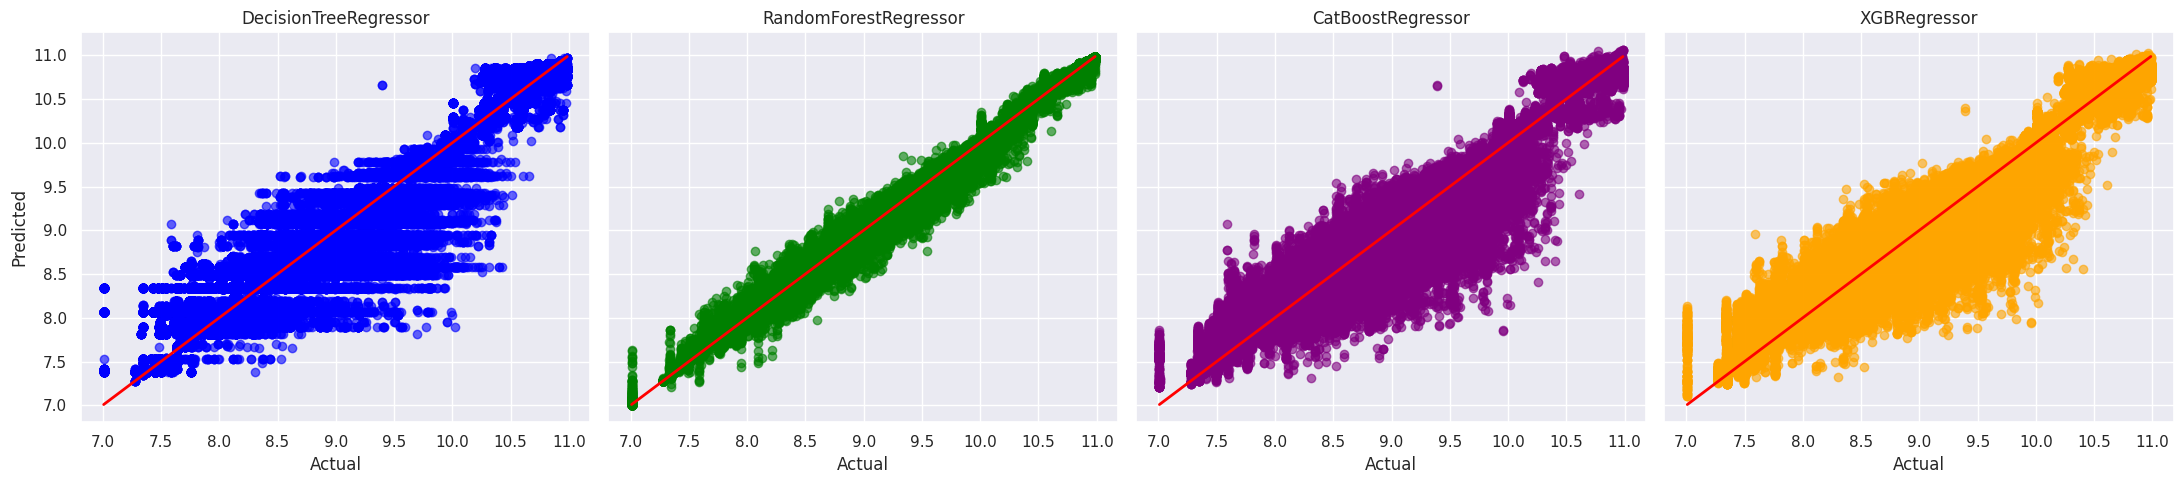

In [ ]:
import matplotlib.pyplot as plt

# Set up a 1x4 subplot grid
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(22, 5))

# DecisionTreeRegressor
ax1.scatter(y_train_dt, y_pred_dt, color='blue', alpha=0.6, label='Prediction vs Target')
ax1.plot([y_train_dt.min(), y_train_dt.max()], [y_train_dt.min(), y_train_dt.max()], color='red', linewidth=2)
ax1.set_title('DecisionTreeRegressor')
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")

# RandomForestRegressor
ax2.scatter(y_train_rf, y_pred_rf, color='green', alpha=0.6, label='Prediction vs Target')
ax2.plot([y_train_rf.min(), y_train_rf.max()], [y_train_rf.min(), y_train_rf.max()], color='red', linewidth=2)
ax2.set_title('RandomForestRegressor')
ax2.set_xlabel("Actual")

# CatBoostRegressor
ax3.scatter(y_train_catboost, y_pred_cat, color='purple', alpha=0.6, label='Prediction vs Target')
ax3.plot([y_train_catboost.min(), y_train_catboost.max()],
         [y_train_catboost.min(), y_train_catboost.max()], color='red', linewidth=2)
ax3.set_title('CatBoostRegressor')
ax3.set_xlabel("Actual")

# XGBRegressor
ax4.scatter(y_train_xgb, y_pred_xgb, color='orange', alpha=0.6, label='Prediction vs Target')
ax4.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], color='red', linewidth=2)
ax4.set_title('XGBRegressor')
ax4.set_xlabel("Actual")

plt.tight_layout()
plt.show()

**Model Evaluation for Test Data**

In [ ]:
y_pred_dt1 = dt_model.predict(x_test_dt)
y_pred_rf1 = rf_model.predict(x_test_rf)
y_pred_xgb1 = xgb_model.predict(x_test_xgb)
y_pred_cat1 = catboost_model.predict(x_test_catboost)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
#Decision Tree
r2=r2_score(y_test_dt,y_pred_dt1)
mae=mean_absolute_error(y_test_dt,y_pred_dt1)
mse=mean_squared_error(y_test_dt,y_pred_dt1)
rmse=np.sqrt(mse)

#RandomForestRegressor
r21=r2_score(y_test_rf,y_pred_rf1)
mae1=mean_absolute_error(y_test_rf,y_pred_rf1)
mse1=mean_squared_error(y_test_rf,y_pred_rf1)
rmse1=np.sqrt(mse1)

#XGBRegressor
r22=r2_score(y_test_xgb,y_pred_xgb1)
mae2=mean_absolute_error(y_test_xgb,y_pred_xgb1)
mse2=mean_squared_error(y_test_xgb,y_pred_xgb1)
rmse2=np.sqrt(mse2)

#CatBRegressor
r23=r2_score(y_test_catboost,y_pred_cat1)
mae3=mean_absolute_error(y_test_catboost,y_pred_cat1)
mse3=mean_squared_error(y_test_catboost,y_pred_cat1)
rmse3=np.sqrt(mse3)




summary=pd.DataFrame(data=['DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','CatBoostRegressor'],columns=['Model'])
summary['R^2']=[r2,r21,r22,r23]
summary['mae']=[mae,mae1,mae2,mae2]
summary['mse']=[mse,mse1,mse2,mse3]
summary['rmse']=[rmse,rmse1,rmse2,rmse3]
summary

,Model,R^2,mae,mse,rmse
0,DecisionTreeRegressor,0.937762,0.179028,0.062908,0.250815
1,RandomForestRegressor,0.982011,0.063653,0.018183,0.134844
2,XGBRegressor,0.956216,0.150110,0.044256,0.210371
3,CatBoostRegressor,0.956107,0.150110,0.044366,0.210632


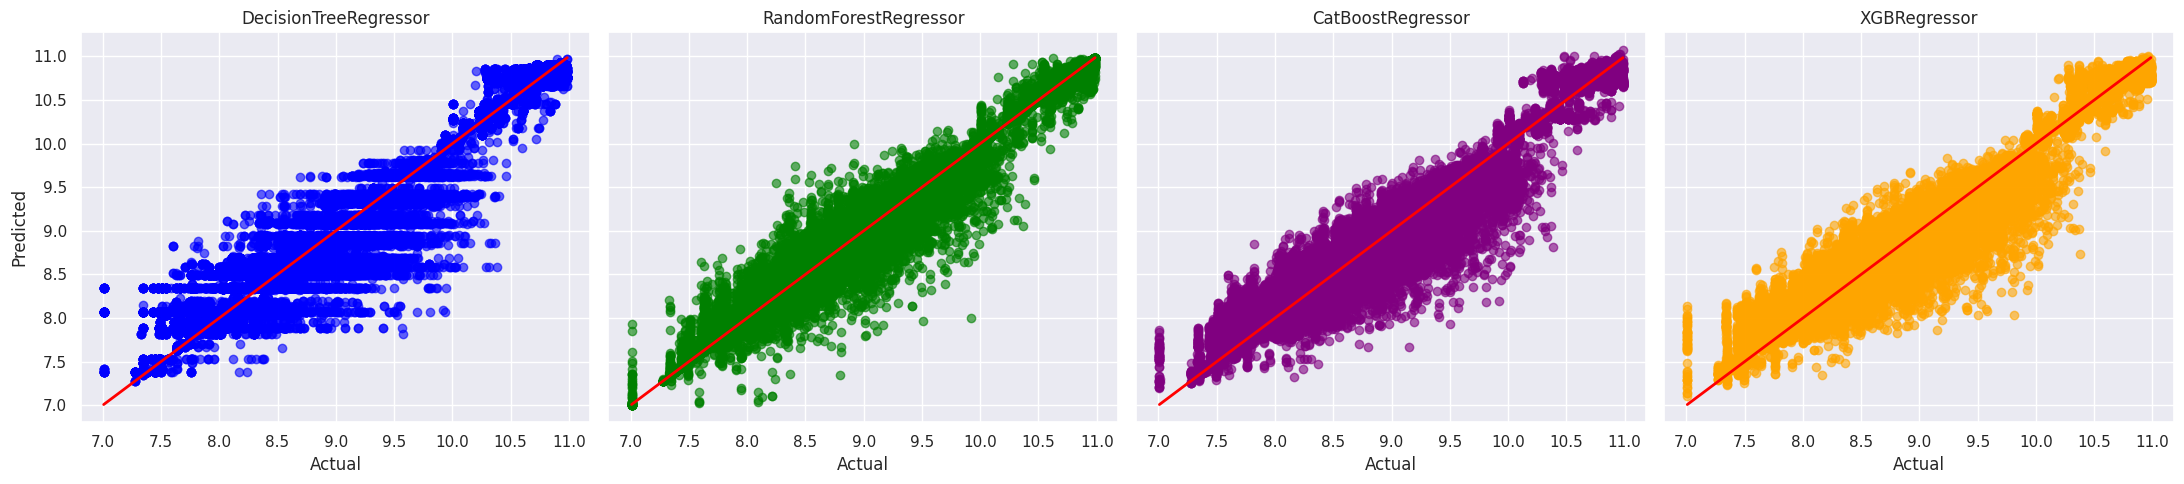

In [ ]:
import matplotlib.pyplot as plt

# Set up a 1x4 subplot grid
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(22, 5))

# DecisionTreeRegressor
ax1.scatter(y_test_dt, y_pred_dt1, color='blue', alpha=0.6, label='Prediction vs Target')
ax1.plot([y_test_dt.min(), y_test_dt.max()], [y_test_dt.min(), y_test_dt.max()], color='red', linewidth=2)
ax1.set_title('DecisionTreeRegressor')
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")

# RandomForestRegressor
ax2.scatter(y_test_rf, y_pred_rf1, color='green', alpha=0.6, label='Prediction vs Target')
ax2.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], color='red', linewidth=2)
ax2.set_title('RandomForestRegressor')
ax2.set_xlabel("Actual")

# CatBoostRegressor
ax3.scatter(y_test_catboost, y_pred_cat1, color='purple', alpha=0.6, label='Prediction vs Target')
ax3.plot([y_test_catboost.min(), y_test_catboost.max()],
         [y_test_catboost.min(), y_test_catboost.max()], color='red', linewidth=2)
ax3.set_title('CatBoostRegressor')
ax3.set_xlabel("Actual")

# XGBRegressor
ax4.scatter(y_test_xgb, y_pred_xgb1, color='orange', alpha=0.6, label='Prediction vs Target')
ax4.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], color='red', linewidth=2)
ax4.set_title('XGBRegressor')
ax4.set_xlabel("Actual")

plt.tight_layout()
plt.show()

**Checking Accuracy using Cross-validation Method**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 5-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Function to evaluate model
def evaluate_model(model, name):
    r2_scores = cross_val_score(model, x, y, cv=kf, scoring= r2_scorer)
    mae_scores = cross_val_score(model, x, y, cv=kf, scoring= mae_scorer)
    rmse_scores = cross_val_score(model, x, y, cv=kf, scoring= rmse_scorer)

    print(f"\n{name} - 5-Fold Cross Validation Results:")
    print(f"Average R2 Score:  {r2_scores.mean():.4f}")
    print(f"Average MAE:       {-mae_scores.mean():.2f}")
    print(f"Average RMSE:      {-rmse_scores.mean():.2f}")

# Run evaluation
evaluate_model(dt_model, "DecisionTreeRegressor")
evaluate_model(rf_model, "RandomForestRegressor")
evaluate_model(xgb_model, "XGBoost Regressor")
evaluate_model(catboost_model, "CATBoost Regressor")


DecisionTreeRegressor - 5-Fold Cross Validation Results:
Average R2 Score:  0.9381
Average MAE:       0.18
Average RMSE:      0.25

RandomForestRegressor - 5-Fold Cross Validation Results:
Average R2 Score:  0.9820
Average MAE:       0.06
Average RMSE:      0.14

XGBoost Regressor - 5-Fold Cross Validation Results:
Average R2 Score:  0.9563
Average MAE:       0.15
Average RMSE:      0.21

CATBoost Regressor - 5-Fold Cross Validation Results:
Average R2 Score:  0.9554
Average MAE:       0.15
Average RMSE:      0.21


**Comparing Accuracy btw Methods- Cross validation vs Train-test split method **

In [ ]:
import pandas as pd

data = {
    'Model': ['Decision Tree', '', 'Random Forest', '', 'XGBoost', '', 'CatBoost', ''],
    'Method': ['Train-Test ', 'Cross-Validation'] * 4,
    'R2 Score': [0.938450, 0.9381, 0.997147,0.9820, 0.957147, 0.9563, 0.956831, 0.9554],
    'MAE': [0.17,0.18 , 0.024, 0.06, 0.148, 0.15,0.20 , 0.21],
    'RMSE': [0.25, 0.25, 0.054, 0.14, 0.148, 0.15, 0.21, 0.21]
}

df = pd.DataFrame(data)
print(df)

           Model            Method  R2 Score    MAE   RMSE
0  Decision Tree       Train-Test   0.938450  0.170  0.250
1                 Cross-Validation  0.938100  0.180  0.250
2  Random Forest       Train-Test   0.997147  0.024  0.054
3                 Cross-Validation  0.982000  0.060  0.140
4        XGBoost       Train-Test   0.957147  0.148  0.148
5                 Cross-Validation  0.956300  0.150  0.150
6       CatBoost       Train-Test   0.956831  0.200  0.210
7                 Cross-Validation  0.955400  0.210  0.210


**Downloading the RFR_Model for deployment**

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train_rf,y_train_rf)
joblib.dump(model,'flightrfm.pkl')

['flightrfm.pkl']

In [ ]:
from google.colab import files
files.download('flightrfm.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>